In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST

In [ ]:
test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [2]:
# Load FashionMNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Define class item names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Convert labels to one-hot encoded vectors
num_classes = len(class_names)
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

# Reshape and normalize data
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255.0

# Define the data augmentation
train_image_generator = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.3
)

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(20, kernel_size=5, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(50, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.h5',
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )
]

# Train the model with data augmentation
history = model.fit(train_image_generator.flow(train_images, train_labels, batch_size=32), epochs=1, validation_data=(test_images, test_labels), callbacks=callbacks)

# Load best weights
model.load_weights('best_model.h5')

# Save the model to a file
model.save('my_model.h5')


# Print out training and validation metrics
print("Training accuracy: ", history.history['accuracy'])
print("Validation accuracy: ", history.history['val_accuracy'])
print("Training loss: ", history.history['loss'])
print("Validation loss: ", history.history['val_loss'])


1875/1875 [==============================] - 93s 49ms/step - loss: 1.0102 - accuracy: 0.6250 - val_loss: 0.6830 - val_accuracy: 0.7315
Training accuracy:  [0.625]
Validation accuracy:  [0.7315000295639038]
Training loss:  [1.0101661682128906]
Validation loss:  [0.6829586625099182]


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 50)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 500)               4

# Filters / Feature Detectors

conv2d (5, 5, 1, 20)
20


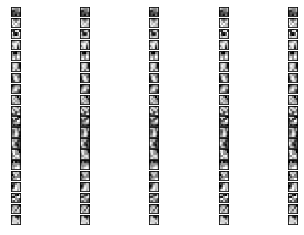

conv2d_1 (5, 5, 20, 50)
50


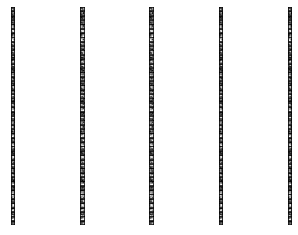

In [ ]:
#Iterate thru all the layers of the model
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias = layer.get_weights()
        print(layer.name, weights.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:,0], cmap='gray')
                filter_cnt+=1
        plt.show()

## I have written my **summary** of the layer activation result observations at **"Activation Layers MNIST with Model"** google colab notebook. 

# Real Test Data Fashion-MNIST Activations : 
 
##Feature Maps

313/313 [==============================] - 3s 9ms/step
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)


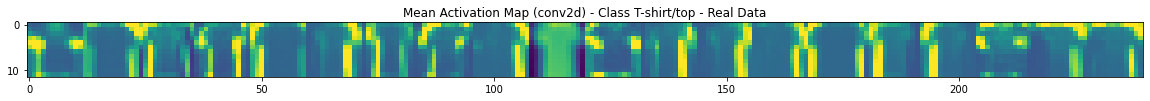

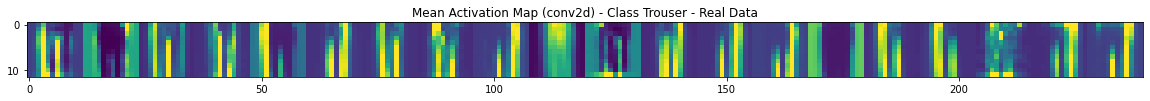

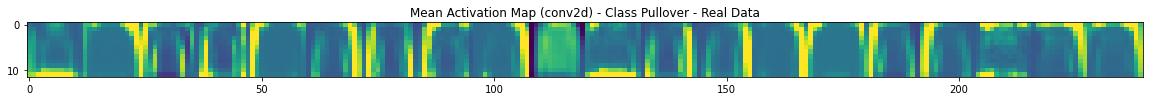

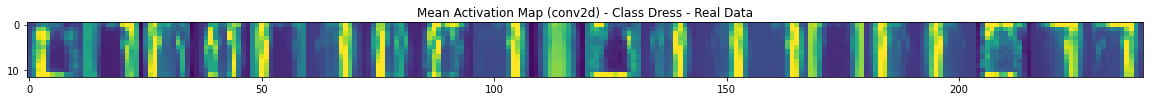

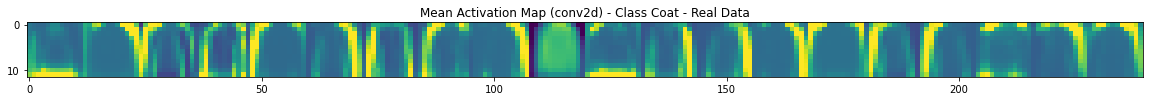

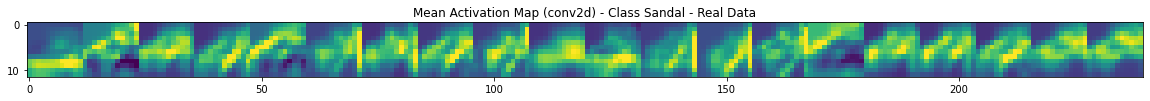

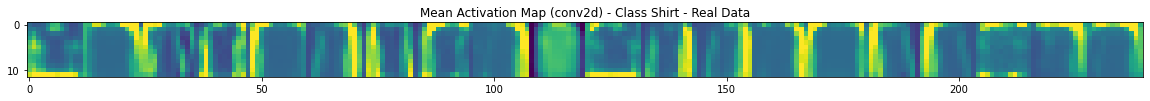

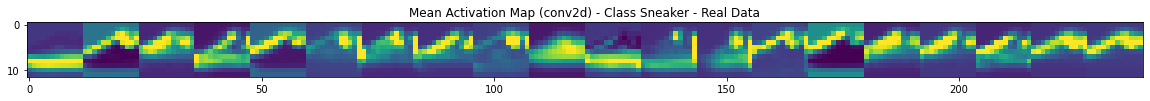

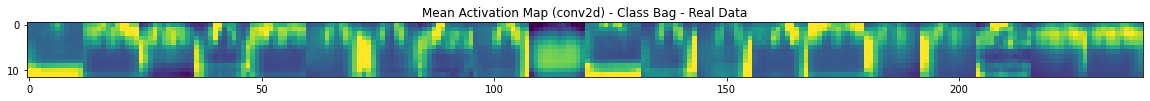

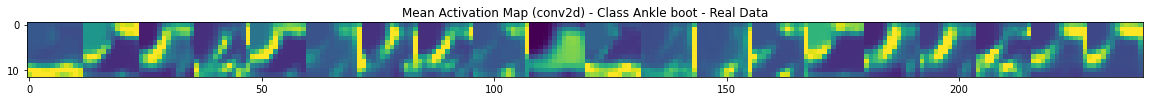

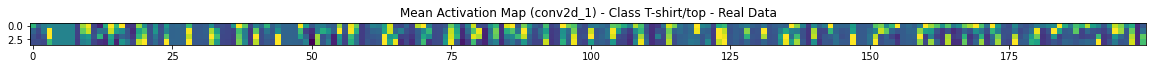

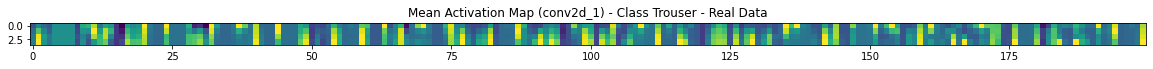

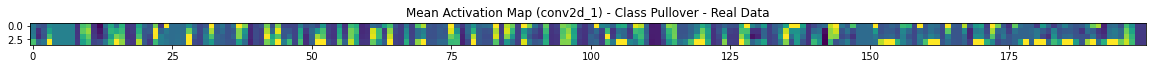

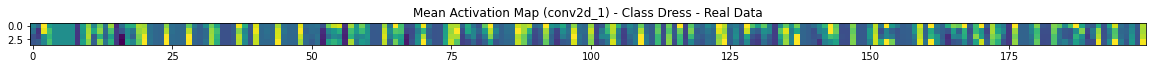

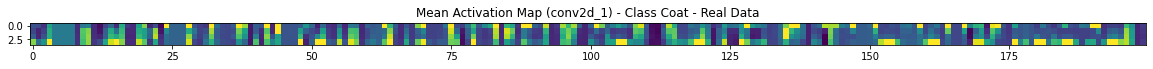

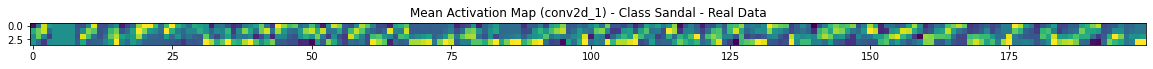

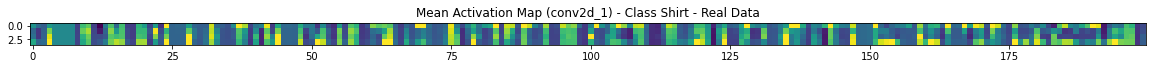

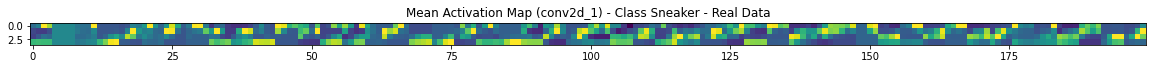

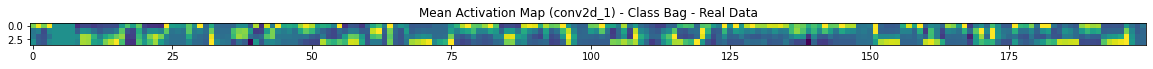

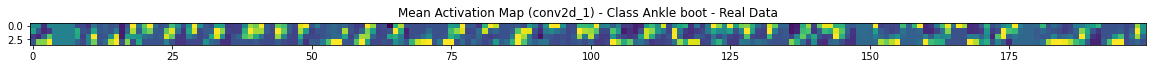

In [ ]:
# Create a new array to store the reshaped images
input_images = np.zeros((test_images.shape[0], 28, 28, 1))

# Reshape each image to (1, 28, 28, 1) and store in input_images
for i in range(test_images.shape[0]):
    input_images[i] = test_images[i].reshape(28, 28, 1)

# Define a new Model to get intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Get the intermediate representations for real data
successive_feature_maps_real = visualization_model.predict(input_images)

# Retrieve the names of the layers
layer_names = [layer.name for layer in model.layers]

# Loop over the layers
for layer_name, feature_map_real in zip(layer_names, successive_feature_maps_real):
  if 'conv' not in layer_name:
    continue

  # Get the number of filters in the current layer
  n_filters = feature_map_real.shape[-1]

# Define class item names
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Loop over the item classes
  for class_idx, class_name in enumerate(class_names):
    # Select the indices of the images that belong to the current item class
      target_indices = np.where(test_labels[:, class_idx] == 1)[0]
      feature_maps_real = feature_map_real[target_indices]


    # Get the mean activation maps for real data and noise data separately
      mean_activation_map_real = np.mean(feature_maps_real, axis=(0))

      print(mean_activation_map_real.shape)
      if len(mean_activation_map_real.shape) == 3:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
        n_features = mean_activation_map_real.shape[-1]  # number of features in the feature map
        size = mean_activation_map_real.shape[1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
        for i in range(n_features):
            x  = mean_activation_map_real[:, :, i]
            x -= x.mean()
            x_std = x.std()
            x /= (x_std + 1e-7)
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( f"Mean Activation Map ({layer_name}) - Class {class_names[class_idx]} - Real Data" )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )


313/313 [==============================] - 3s 8ms/step


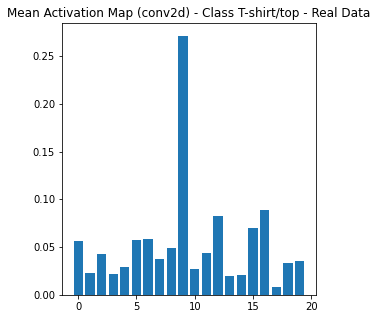

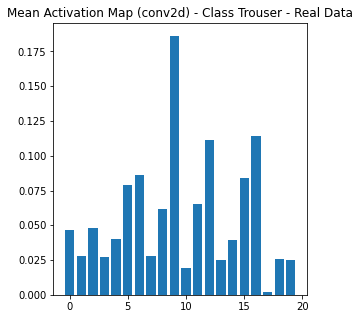

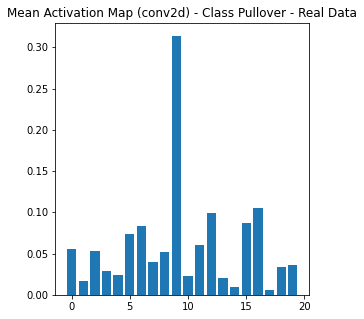

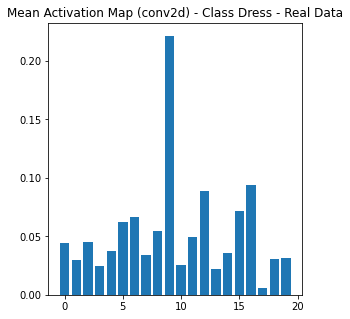

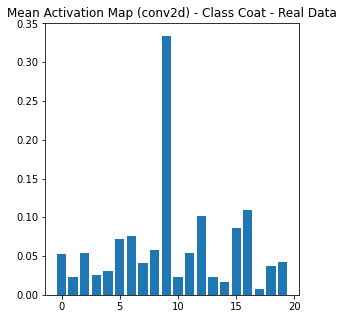

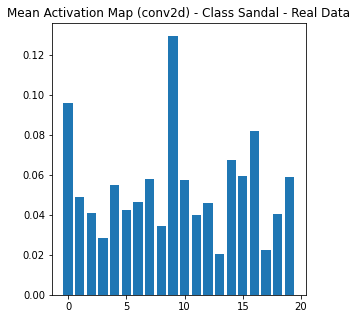

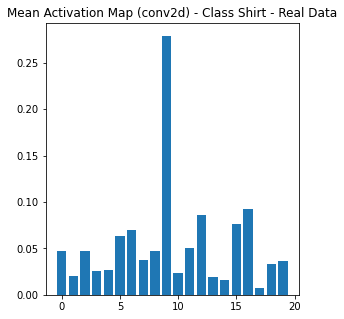

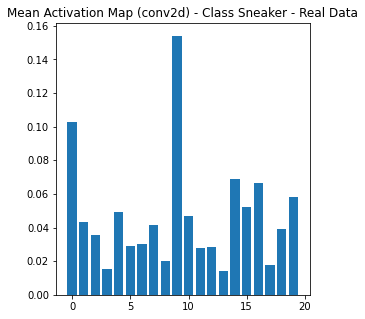

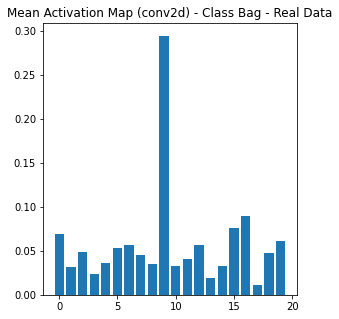

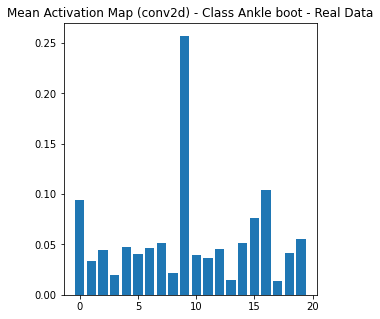

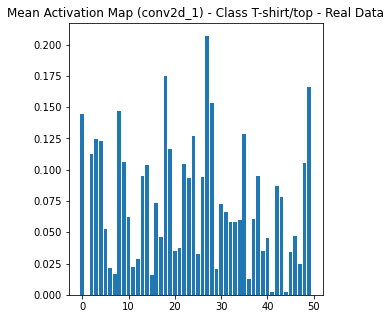

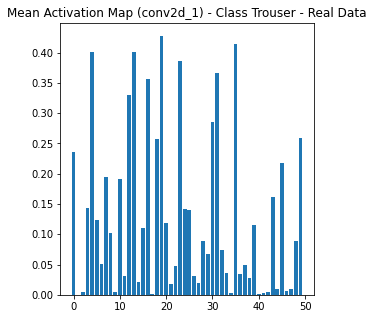

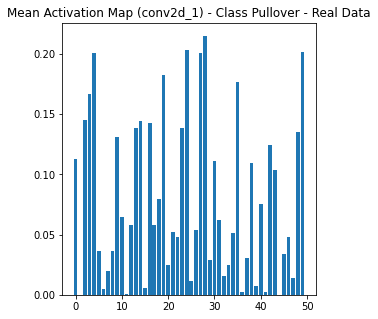

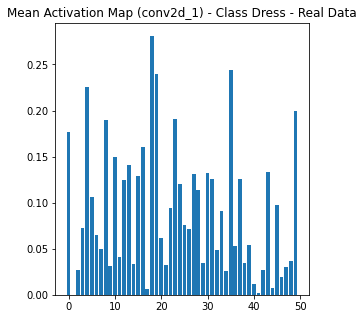

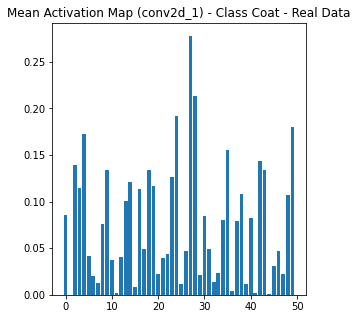

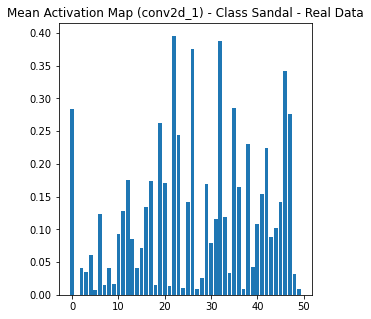

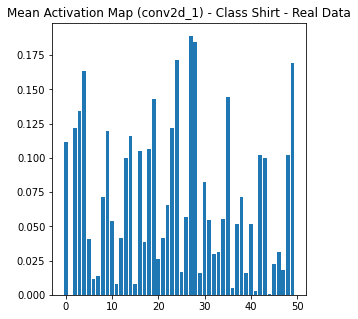

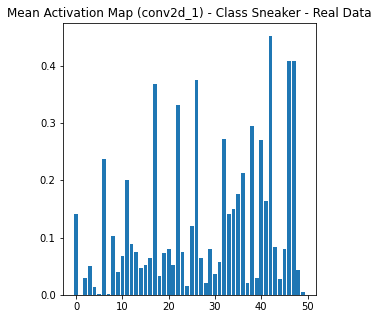

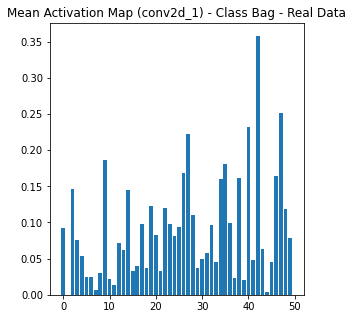

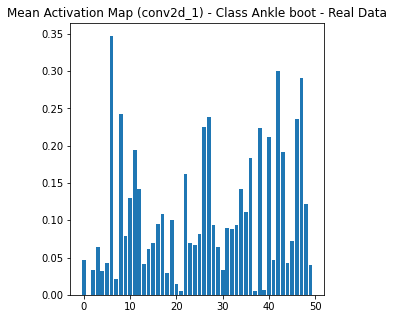

In [ ]:
# Define a new Model to get intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Get the intermediate representations for real data
successive_feature_maps_real = visualization_model.predict(test_images)

# Retrieve the names of the layers
layer_names = [layer.name for layer in model.layers]

# Loop over the layers
for layer_name, feature_map_real in zip(layer_names, successive_feature_maps_real):
  if 'conv' not in layer_name:
    continue

  # Get the number of filters in the current layer
  n_filters = feature_map_real.shape[-1]

  # Define class item names
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Loop over the item classes
  for class_idx, class_name in enumerate(class_names):
    # Select the indices of the images that belong to the current item class
      target_indices = np.where(test_labels[:, class_idx] == 1)[0]
      feature_maps_real = feature_map_real[target_indices]

    # Get the mean activation maps for real data and noise data separately
      mean_activation_map_real = np.mean(feature_maps_real, axis=(0,1,2))

    # Plot the mean activation maps for real and noise data side by side
      plt.figure(figsize=(10,5))
      plt.subplot(1,2,1)
      plt.title(f"Mean Activation Map ({layer_name}) - Class {class_names[class_idx]} - Real Data")
      plt.bar(range(n_filters), mean_activation_map_real)
      plt.show()


# Noisy image mean activation maps


### The noisy images: all_noise_maps

In [5]:
# Define the gamma value
gamma = 0.2

# Define the number of samples and image shape
n_samples = 500
img_shape = (28, 28)

# Define the classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
           'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define transformation to normalize the data
transform = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Load test dataset
(test_images, test_labels), _ = tf.keras.datasets.fashion_mnist.load_data()
testset = tf.data.Dataset.from_tensor_slices((test_images.reshape(-1, 28, 28, 1), test_labels))

def generate_noise_maps_per_class(cls, n_samples, gamma, img_shape=(28, 28)):
    noise_maps = []
    labels = []
    class_indices = np.where(np.array(test_labels) == cls)[0]
    class_indices = class_indices[:n_samples]
    print(f"Number of images for class {classes[cls]}: {len(class_indices)}")
    for idx in class_indices:
        # Get original image
        img = test_images[idx]
        # Generate random noise
        noise = np.random.randn(*img_shape)
        # Combine noise with original image
        noisy_img = gamma * noise + (1 - gamma) * img
        noise_maps.append(noisy_img)
        labels.append(cls)
    return np.array(noise_maps) , np.array(labels)

# Generate noise maps for each class and average them
noise_maps=[]
avgd_noise_maps = []
labels = []
for cls in range(len(classes)):
    class_noise_maps , class_names = generate_noise_maps_per_class(cls, n_samples, gamma, img_shape=(28,28))
    avg_noise_map = np.mean(class_noise_maps, axis=0)
    avgd_noise_maps.append(avg_noise_map)
    noise_maps.append(class_noise_maps)
    labels.append(class_names)

all_noise_maps = np.concatenate(noise_maps)
all_labels = np.concatenate(labels)


Number of images for class T-shirt/top: 500
Number of images for class Trouser: 500
Number of images for class Pullover: 500
Number of images for class Dress: 500
Number of images for class Coat: 500
Number of images for class Sandal: 500
Number of images for class Shirt: 500
Number of images for class Sneaker: 500
Number of images for class Bag: 500
Number of images for class Ankle boot: 500


## Feature Maps

157/157 [==============================] - 2s 11ms/step
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(12, 12, 20)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)
(4, 4, 50)


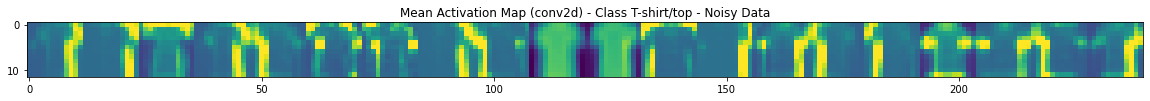

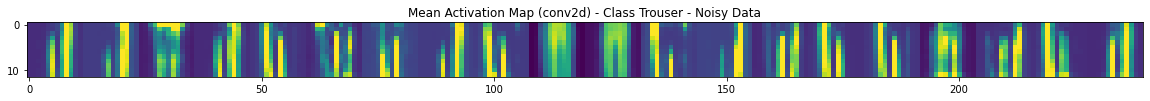

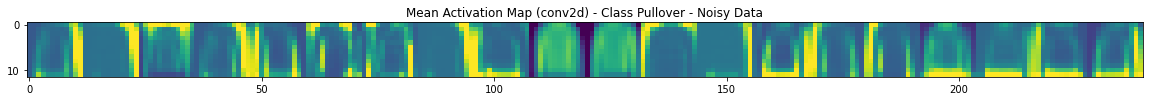

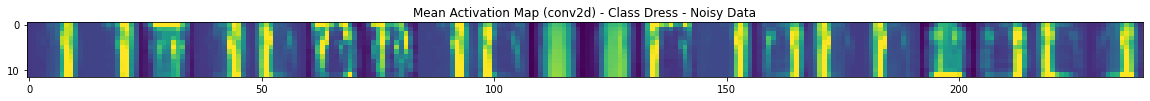

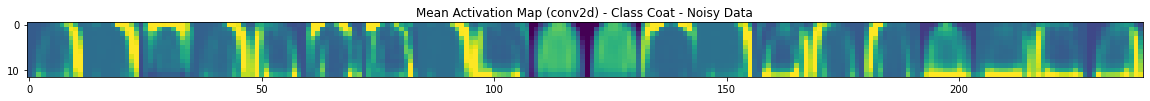

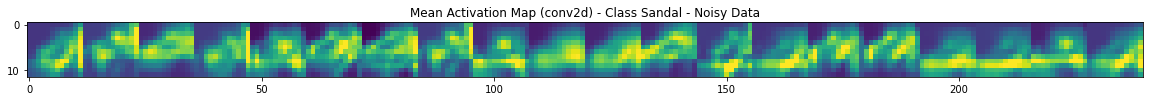

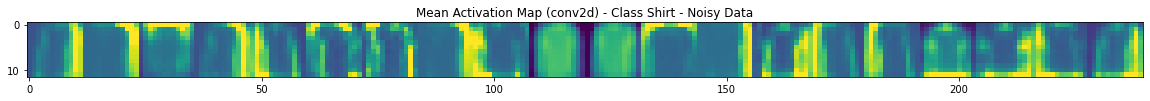

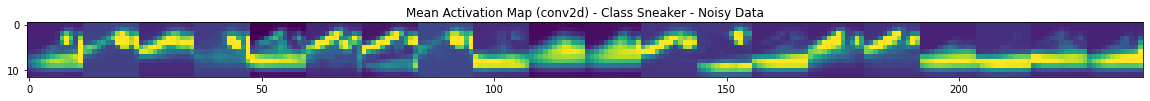

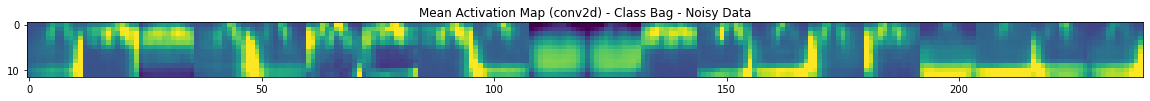

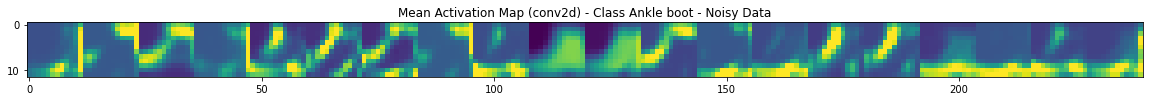

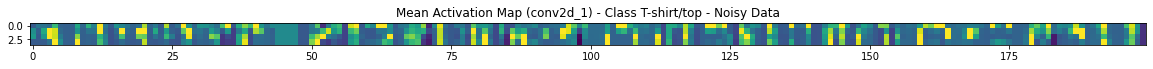

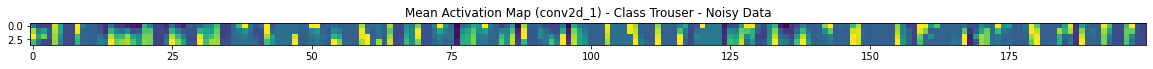

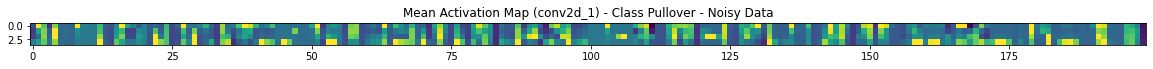

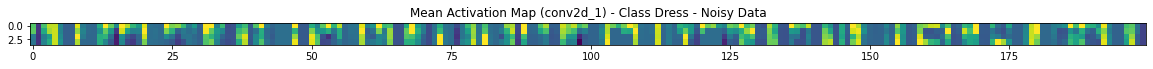

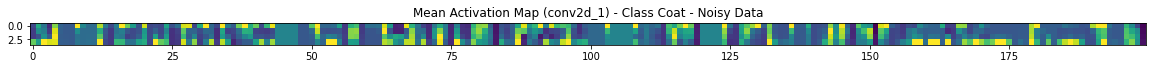

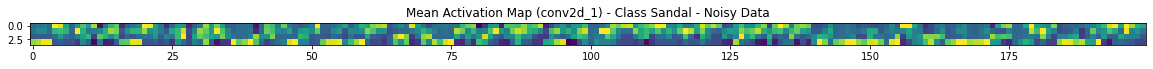

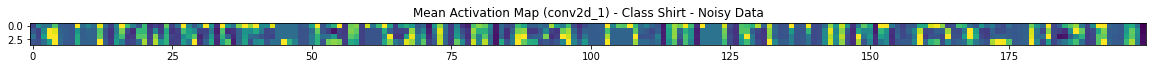

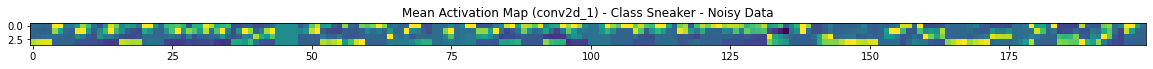

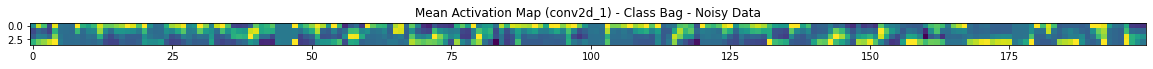

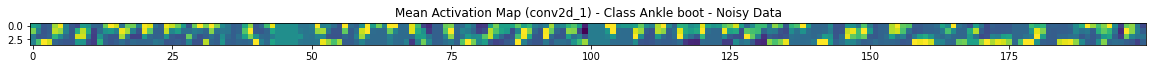

In [9]:
# Create a new array to store the reshaped images
input_images = np.zeros((all_noise_maps.shape[0], 28, 28, 1))

# Reshape each image to (1, 28, 28, 1) and store in input_images
for i in range(all_noise_maps.shape[0]):
    input_images[i] = all_noise_maps[i].reshape(28, 28, 1)

# Define a new Model to get intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Get the intermediate representations for real data
successive_feature_maps_real = visualization_model.predict(input_images)

# Retrieve the names of the layers
layer_names = [layer.name for layer in model.layers]

# Loop over the layers
for layer_name, feature_map_real in zip(layer_names, successive_feature_maps_real):
  if 'conv' not in layer_name:
    continue

  # Get the number of filters in the current layer
  n_filters = feature_map_real.shape[-1]

  # Define class item names
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  # Define the digits to generate noise maps for
  num_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  # Loop over the classes
  for class_idx in num_classes:
    # Select the feature maps that correspond to the target class
    target_indices = np.where(all_labels == class_idx)[0]
    feature_maps_real = feature_map_real[target_indices]

    # Get the mean activation maps for real data and noise data separately
    mean_activation_map_real = np.mean(feature_maps_real, axis=(0))

    print(mean_activation_map_real.shape)
    if len(mean_activation_map_real.shape) == 3:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
      n_features = mean_activation_map_real.shape[-1]  # number of features in the feature map
      size = mean_activation_map_real.shape[1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
      display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
      for i in range(n_features):
          x  = mean_activation_map_real[:, :, i]
          x -= x.mean()
          x_std = x.std()
          x /= (x_std + 1e-7)
          x *=  64
          x += 128
          x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
          display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
      scale = 20. / n_features
      plt.figure( figsize=(scale * n_features, scale) )
      plt.title ( f"Mean Activation Map ({layer_name}) - Class {class_names[class_idx]} - Noisy Data")
      plt.grid  ( False )
      plt.imshow( display_grid, aspect='auto', cmap='viridis' )

157/157 [==============================] - 2s 11ms/step


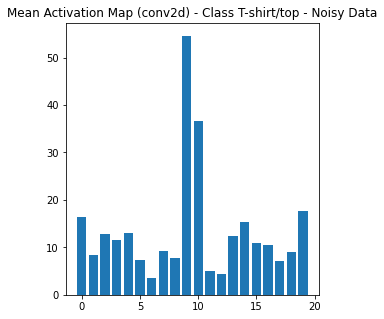

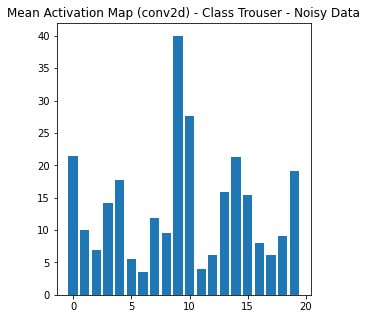

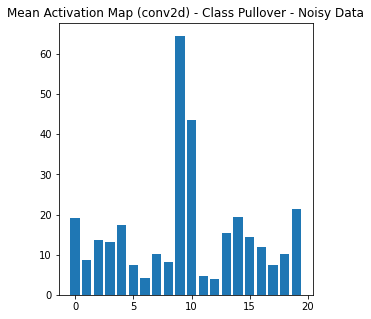

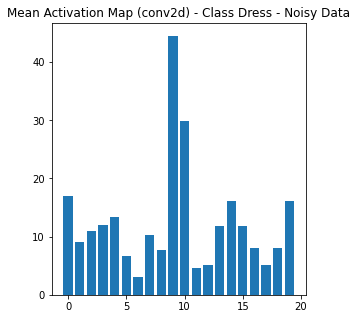

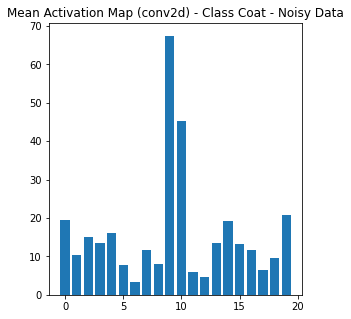

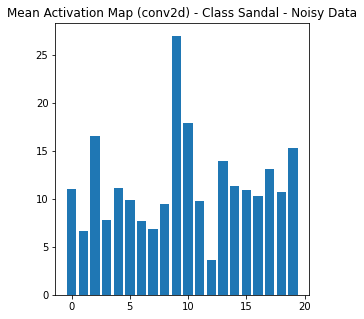

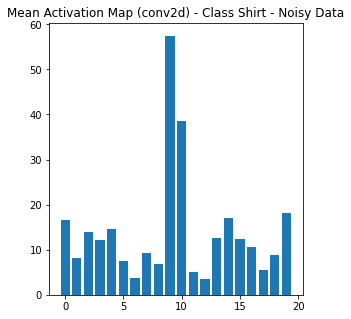

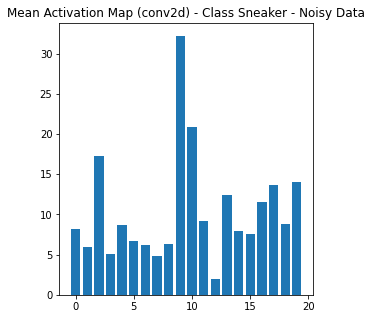

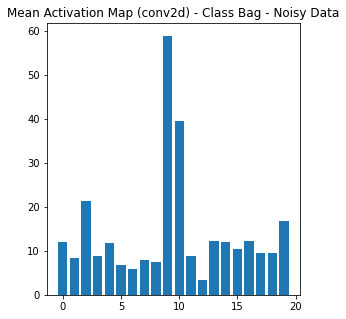

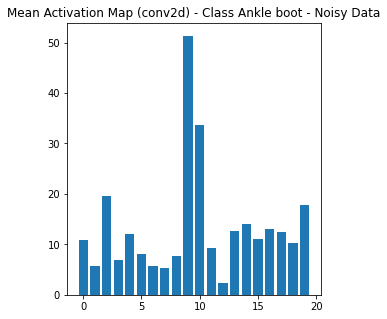

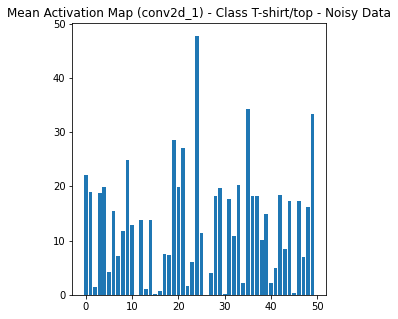

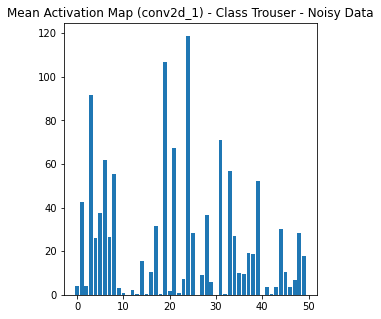

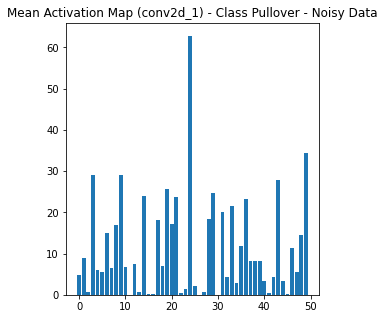

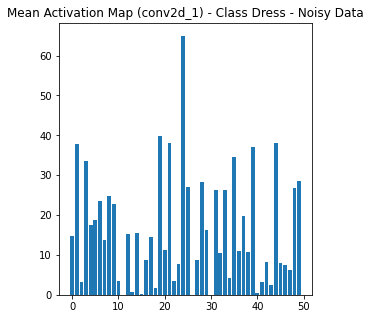

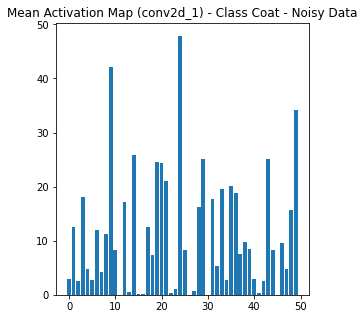

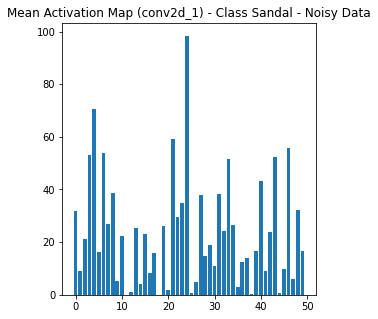

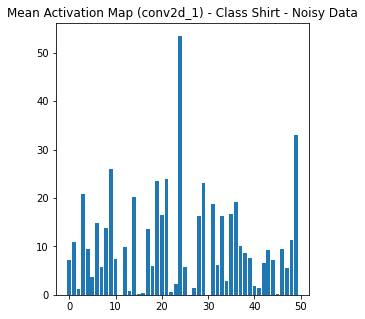

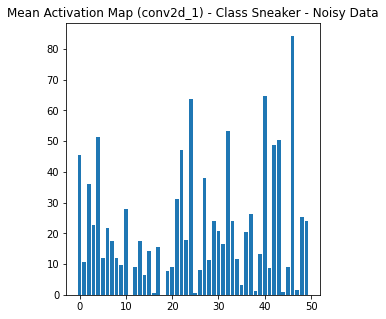

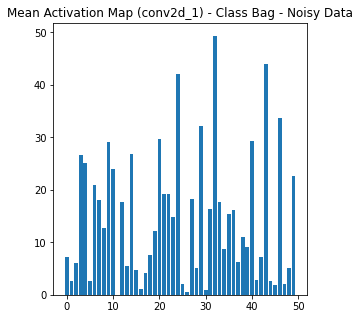

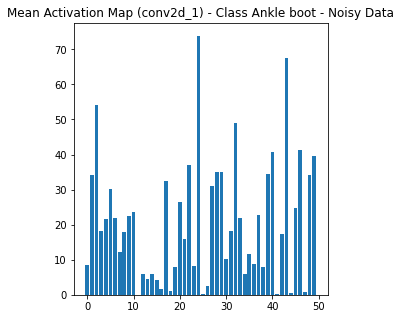

In [10]:
# Define a new Model to get intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Get the intermediate representations for real data
successive_feature_maps_real = visualization_model.predict(all_noise_maps)

# Retrieve the names of the layers
layer_names = [layer.name for layer in model.layers]

# Loop over the layers
for layer_name, feature_map_noise in zip(layer_names, successive_feature_maps_real):
  if 'conv' not in layer_name:
    continue

  # Get the number of filters in the current layer
  n_filters = feature_map_noise.shape[-1]

  # Define class item names
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  # Define the digits to generate noise maps for
  num_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  # Loop over the classes
  for class_idx in num_classes:
    # Select the feature maps that correspond to the target class
    target_indices = np.where(all_labels == class_idx)[0]
    feature_maps_noise = feature_map_noise[target_indices]

    # Get the mean activation maps for real data and noise data separately
    mean_activation_map_noise = np.mean(feature_maps_noise, axis=(0,1,2))

    # Plot the mean activation maps for real and noise data side by side
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(f"Mean Activation Map ({layer_name}) - Class {class_names[class_idx]} - Noisy Data")
    plt.bar(range(n_filters), mean_activation_map_noise)
    plt.show()